<hr style="height:10px">

<div class='container2'>
    <h1>Compass UOL - Programa de Bolsas Data-Science AWS</h1>
</div>

<hr style="height:5px">

<h2>Projeto da Sprint 5:  Modelo de Regressão para Prever o Preço de Carros</h2>

<h3>Bolsista: Lucas Oliveira</h3>

<hr style="height:2px">

In [1]:
# import xgboost
# print(xgboost.__version__)
# # # import sklearn
# # print(sklearn.__version__)

1.7.5


# Importação e divisão dos dados

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [160]:
# from google.colab import drive
# drive.mount('/content/drive')

In [161]:
data = pd.read_csv('./data/cars.csv')
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estagio/data/cars.csv') # usar no Colab
print('Dimensões do dataset: ',data.shape)
data.head()

Dimensões do dataset:  (762091, 20)


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


1. Dividindo o datase nas proporções pedidas.

In [162]:
# Procentagem amostral de 25%
amostra_simples = data.sample(frac=0.25, random_state=1) # usando os paramentro random_state=1 para garantir que a amostra seja sempre a mesma.
print(f'Dimensão do conjunto de dados:\nNº Linhas: {amostra_simples.shape[0]} \nNº Colunas: {amostra_simples.shape[1]}')
amostra_simples.head()

Dimensão do conjunto de dados:
Nº Linhas: 190523 
Nº Colunas: 20


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.0,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.0,1.0,0.0,Schaumburg Ford,4.1,4.0,45.0,500.0,53950.0
563956,Nissan,Armada SL,2017,63009.0,5.6L V8 32V GDI DOHC,7-Speed Automatic,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.0,0.0,1.0,World Auto Inc.,2.3,4.7,78.0,NaN,27885.0
724184,Toyota,Tundra 1794,2018,51316.0,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Automatic,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.0,NaN,1.0,CAL Cars,4.4,4.8,199.0,1000.0,46995.0
706657,Toyota,Avalon XLE,2015,89444.0,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.0,1.0,1.0,Scanlon Lexus,4.7,4.7,74.0,482.0,17987.0
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.0,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.0,1.0,1.0,Lupient Buick GMC,4.5,NaN,0.0,5969.0,96648.0


# Analize exploratoria

#### Transformação de 'object' para 'category' para poupar mémoria.

In [163]:
print(amostra_simples.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190523 entries, 456056 to 559392
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190523 non-null  object 
 1   model                190523 non-null  object 
 2   year                 190523 non-null  int64  
 3   mileage              190403 non-null  float64
 4   engine               186724 non-null  object 
 5   transmission         188036 non-null  object 
 6   drivetrain           185161 non-null  object 
 7   fuel_type            184720 non-null  object 
 8   mpg                  154790 non-null  object 
 9   exterior_color       188314 non-null  object 
 10  interior_color       176409 non-null  object 
 11  accidents_or_damage  184474 non-null  float64
 12  one_owner            182675 non-null  float64
 13  personal_use_only    184325 non-null  float64
 14  seller_name          188306 non-null  object 
 15  seller_rating    

In [164]:
# Filtrando os nomes das colunas por tipo de dado
cols_num = amostra_simples.select_dtypes(include=['float64', 'int64']).columns
cols_obj = amostra_simples.select_dtypes(include=['object']).columns

In [165]:
# tranformaando ao cols object em category
amostra_simples[cols_obj] = amostra_simples[cols_obj].astype('category')

print(amostra_simples.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190523 entries, 456056 to 559392
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   manufacturer         190523 non-null  category
 1   model                190523 non-null  category
 2   year                 190523 non-null  int64   
 3   mileage              190403 non-null  float64 
 4   engine               186724 non-null  category
 5   transmission         188036 non-null  category
 6   drivetrain           185161 non-null  category
 7   fuel_type            184720 non-null  category
 8   mpg                  154790 non-null  category
 9   exterior_color       188314 non-null  category
 10  interior_color       176409 non-null  category
 11  accidents_or_damage  184474 non-null  float64 
 12  one_owner            182675 non-null  float64 
 13  personal_use_only    184325 non-null  float64 
 14  seller_name          188306 non-null  category
 15  

In [166]:
cols_obj = amostra_simples.select_dtypes(include=['category']).columns # refiltrando as colunas categóricas

# algumas estatisca descritivas das colunas numéricas
amostra_simples.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,190523.000000,190403.000000,184474.000000,182675.000000,184325.000000,137082.000000,182603.000000,190523.000000,102644.000000,1.905230e+05
mean,2017.812112,55719.122971,0.229669,0.561768,0.657632,4.160481,4.623686,89.429145,1009.271502,4.308581e+04
std,5.041562,43625.793000,0.420621,0.496171,0.474503,0.804897,0.276308,114.995311,1309.597297,3.239942e+06
min,1923.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,3.190000e+02
25%,2016.000000,23177.500000,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,384.000000,1.958800e+04
50%,2019.000000,45468.000000,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,645.000000,2.799500e+04
75%,2021.000000,78427.500000,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1009.000000,3.950000e+04
max,2023.000000,999999.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,79909.000000,1.000000e+09


#### Valores duplicados

Nesta etapa, será realizada a remoção de registros duplicados. Para isso, serão comparados todos os campos de cada linha e, caso sejam encontrados registros idênticos em todas as colunas, apenas um será mantido no conjunto de dados, e os demais serão excluídos.

In [167]:
duplicados = amostra_simples.loc[amostra_simples.duplicated(keep=False) == True].sort_values(by='manufacturer')
# sem o parametro Keep = False 548 rows × 20 columns
# quantidade de valores duplicados
print('A quantidade de valores duplicados: ',amostra_simples.duplicated().sum())

A quantidade de valores duplicados:  548


In [168]:
duplicados['manufacturer'].value_counts()

manufacturer
Ford             92
Chrysler         63
Chevrolet        62
Dodge            62
Nissan           62
Kia              62
Honda            60
BMW              60
Subaru           56
GMC              50
Jeep             50
Toyota           44
Acura            40
Lexus            36
Mercedes-Benz    34
Cadillac         34
Volkswagen       30
Mazda            30
INFINITI         28
Buick            26
Audi             22
Hyundai          18
Porsche          18
RAM              12
Land Rover       12
Mitsubishi       12
Volvo             8
Tesla             8
Lincoln           2
Jaguar            0
Name: count, dtype: int64

In [169]:
# Um exemplo de duplicação.
duplicados.loc[duplicados['manufacturer'] == 'Volvo'].sort_values(by=['model','year'])

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
757426,Volvo,XC60 T6 Momentum,2020,14355.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,AWD,Gasoline,20-27,Black Stone,Blond,1.0,0.0,0.0,Gene Pankey Motor Company,NaN,4.9,40.0,393.0,37995.0
757345,Volvo,XC60 T6 Momentum,2020,14355.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,AWD,Gasoline,20-27,Black Stone,Blond,1.0,0.0,0.0,Gene Pankey Motor Company,NaN,4.9,40.0,393.0,37995.0
752588,Volvo,XC90 T6 Momentum,2016,106864.0,"Drive-E 2L I-4 gasoline direct injection, DOHC...",Automatic,All-wheel Drive,Gasoline,20-25,Black,NaN,0.0,0.0,1.0,Champion Auto Sales,5.0,4.5,70.0,395.0,22702.0
753423,Volvo,XC90 T6 Momentum,2016,106864.0,"Drive-E 2L I-4 gasoline direct injection, DOHC...",Automatic,All-wheel Drive,Gasoline,20-25,Black,NaN,0.0,0.0,1.0,Champion Auto Sales,5.0,4.5,70.0,395.0,22702.0
754213,Volvo,XC90 T6 Momentum,2021,14465.0,"Drive-E 2L I-4 gasoline direct injection, DOHC...",Automatic,All-wheel Drive,Gasoline,19-0,Denim Blue Metallic,Blond,NaN,NaN,NaN,Poquet Auto,4.6,5.0,21.0,NaN,52950.0
753939,Volvo,XC90 T6 Momentum,2021,14465.0,"Drive-E 2L I-4 gasoline direct injection, DOHC...",Automatic,All-wheel Drive,Gasoline,19-0,Denim Blue Metallic,Blond,NaN,NaN,NaN,Poquet Auto,4.6,5.0,21.0,NaN,52950.0
753349,Volvo,XC90 T6 Momentum 7 Passenger,2021,27517.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,19-28,White,NaN,0.0,1.0,1.0,Jack Ingram Motors,NaN,5.0,21.0,NaN,49991.0
753438,Volvo,XC90 T6 Momentum 7 Passenger,2021,27517.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,19-28,White,NaN,0.0,1.0,1.0,Jack Ingram Motors,NaN,5.0,21.0,NaN,49991.0


Acima temos um exemplo de duplicação. Durante a análise, foi identificado que existem 8 veículos da marca Volvo com registros duplicados. Embora entre esses veículos existam diferentes modelos, as informações registradas em cada linha são idênticas, caracterizando duplicidades. Nesse caso, as duplicatas serão removidas, mantendo apenas um registro por conjunto de informações idênticas.

Removendo os dados duplicados

In [170]:
amostra_simples.drop_duplicates(inplace=True)

In [171]:
duplicados = amostra_simples.loc[amostra_simples.duplicated(keep=False) == True].sort_values(by='manufacturer')
duplicados['manufacturer'].value_counts()

manufacturer
Acura            0
Audi             0
BMW              0
Buick            0
Cadillac         0
Chevrolet        0
Chrysler         0
Dodge            0
Ford             0
GMC              0
Honda            0
Hyundai          0
INFINITI         0
Jaguar           0
Jeep             0
Kia              0
Land Rover       0
Lexus            0
Lincoln          0
Mazda            0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Porsche          0
RAM              0
Subaru           0
Tesla            0
Toyota           0
Volkswagen       0
Volvo            0
Name: count, dtype: int64

In [172]:
# quantidade de valores duplicados
print('A quantidade de valores duplicados: ',len(duplicados))

A quantidade de valores duplicados:  0


#### Valores outliers.

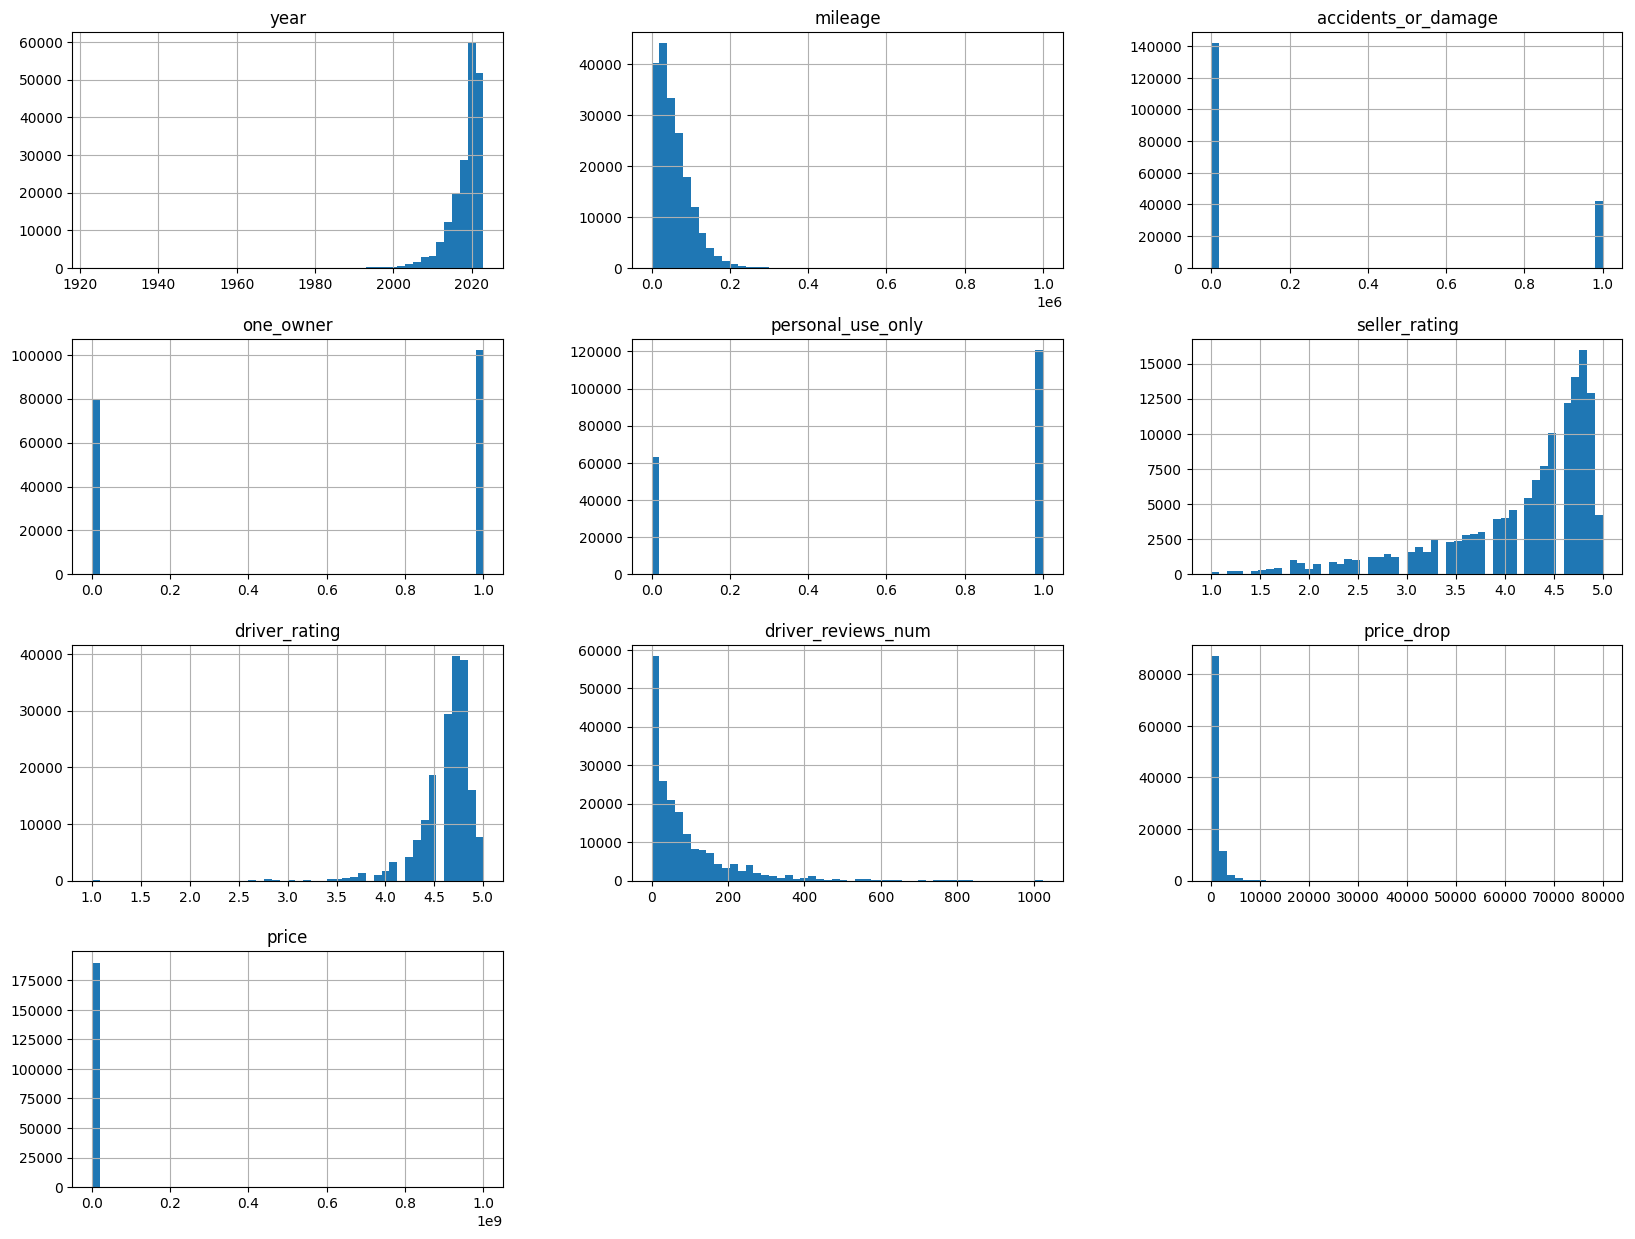

In [173]:
# histograma das variáveis numéricas sem nenhum tratamento de outliers ou normalização de dados
amostra_simples.hist(bins=50, figsize=(20,15))
plt.show()

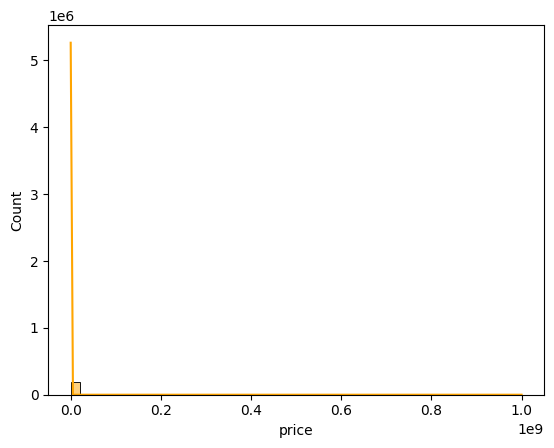

In [174]:
# Histograma apenas da variável price
sns.histplot(amostra_simples, x='price', bins=50, color="orange", kde=True);

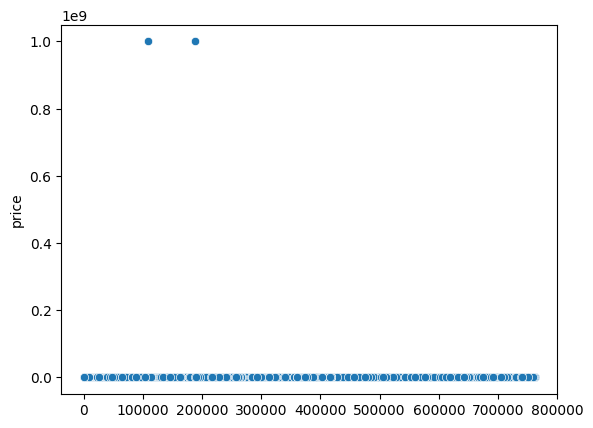

In [175]:
# Distribuição com scatter plot apenas da variável price
sns.scatterplot(amostra_simples['price']);

Este filtro tem como objetivo identificar valores outliers destacados no scatterplot. Esses outliers serão analisados detalhadamente e, se necessário, removidos do conjunto de dados em etapas posteriores.

In [176]:
val_max = amostra_simples['price'].max()
max = amostra_simples[amostra_simples['price'] >= val_max]
# print(max)
max

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
188260,Dodge,Durango Citadel,2018,113207.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.8,146.0,NaN,1.000000e+09
108142,Chevrolet,Cobalt LT,2009,85185.0,2.2L I4 16V MPFI DOHC,4-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Black,Gray,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.2,90.0,NaN,1.000000e+09


Q1: 19590.0 
Q3: 39500.0 
Outlier: 69365.0


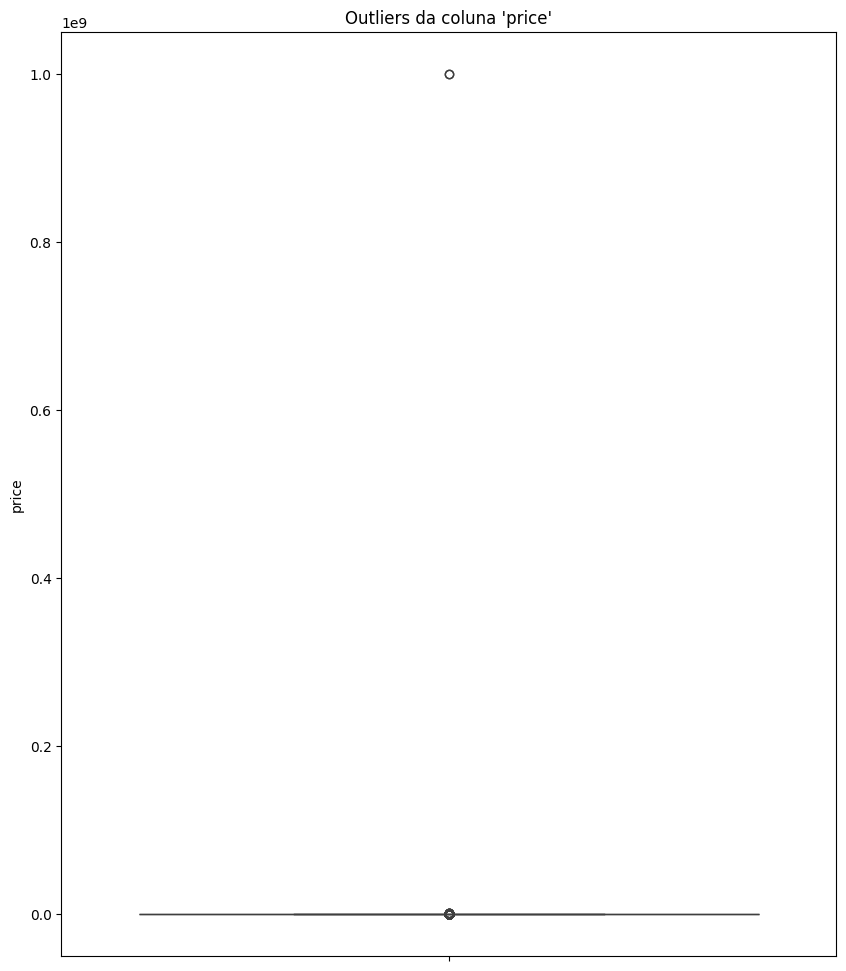

In [177]:
q1 = amostra_simples['price'].quantile(0.25)
q3 = amostra_simples['price'].quantile(0.75)

iqr = q3 - q1
outlier = q3 + 1.5 * iqr
print (f'Q1: {q1} \nQ3: {q3} \nOutlier: {outlier}')

plt.figure(figsize=(10,12))
plt.title("Outliers da coluna 'price'")
sns.boxplot( y = 'price', data= amostra_simples);

In [178]:
amostra_simples['price'].min()

np.float64(319.0)

In [179]:
amostra_simples.loc[amostra_simples['price'] < 500]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
553053,Mitsubishi,Outlander Sport SE,2021,56509.0,Engine: 2.0L MIVEC DOHC 4-Cylinder,Automatic,Four-wheel Drive,Gasoline,23-29,Diamond White Pearl,Black,0.0,1.0,0.0,Lions Pre-Owned,NaN,4.9,16.0,NaN,399.0
736374,Volkswagen,Jetta S,2019,120092.0,Engine: 1.4L TSI I-4 Turbocharged -inc: DOHC 1...,Automatic,Front-wheel Drive,Gasoline,30-40,Pure White,Storm Gray/Black,0.0,1.0,0.0,Lions Pre-Owned,NaN,4.5,259.0,NaN,319.0
680496,Toyota,C-HR LE,2019,104481.0,Engine: 2.0L I-4 DOHC 16-Valve -inc: valvematic,Automatic,Front-wheel Drive,Gasoline,27-31,Magnetic Gray Metallic,Gray,1.0,0.0,0.0,Lions Pre-Owned,NaN,4.8,92.0,NaN,399.0


Analizando o modelo dos veiculos, percebe-se que realmente houve um erro ao informar o valor. Os dois registros serão removidos, e as analizes serão refeitas.

In [180]:
amostra_simples.drop(max.index, inplace=True)

* Nova analise de preços após remoção dos dois outliers

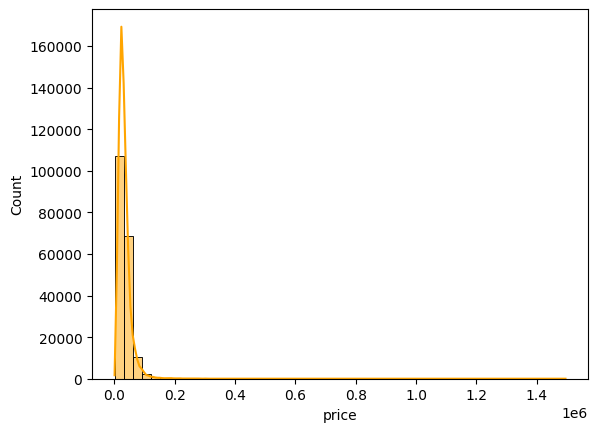

In [181]:
sns.histplot(amostra_simples, x='price', bins=50, color="orange", kde=True);

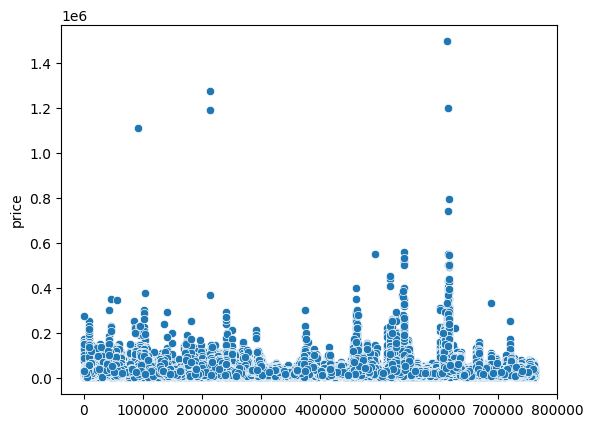

In [182]:
sns.scatterplot(amostra_simples['price']);

In [183]:
amostra_simples['price'].max()

np.float64(1495000.0)

In [184]:
amostra_simples.loc[amostra_simples['price'] == amostra_simples['price'].max()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
613083,Porsche,Carrera GT,2005,5052.0,5.7L V10 40V MPFI DOHC,6-Speed Manual,Rear-wheel Drive,Gasoline,10-16,Silver,Brown,0.0,NaN,1.0,ZWECK,NaN,4.5,5.0,NaN,1495000.0


Analisando o Preço de US$ 1.495.000:

Preço Alto, mas possível para um Porsche Carrera GT 2005 em excelentes condições, com baixa quilometragem e histórico impecável, um valor próximo de US$ 1.500.000 é considerado plausível, especialmente em mercados específicos ou leilões.

Para um Porsche Carrera GT 2005, 5052.0 milhas (aproximadamente 8125 km) é considerado um valor de quilometragem extremamente baixo.
* Calculo:   
    - 1 milha equivale a aproximadamente 1,609 Km.
    - logo: 5052.0 milhas * 1,609 Km/milha = 8125,188 Km

Portanto, não será removido do dataset.

Q1: 19590.0 
Q3: 39500.0 
Outlier: 69365.0


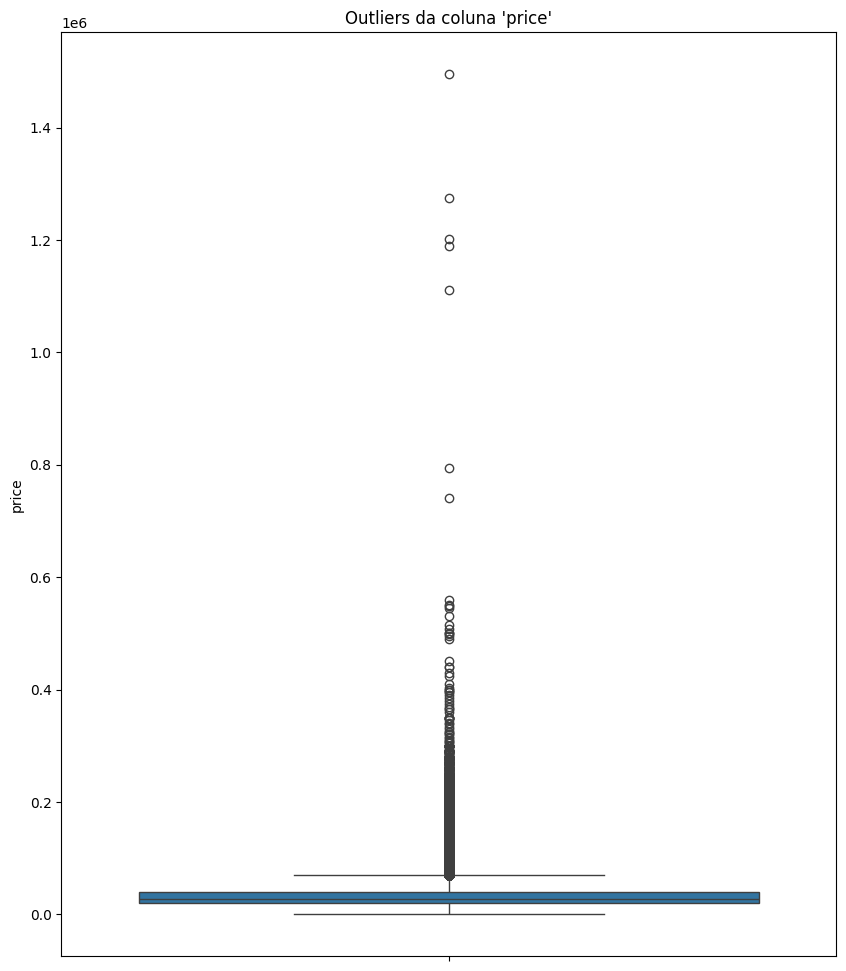

In [185]:
# pos drop de outliers (veiculos com preço maior que 1 bi)
q1 = amostra_simples['price'].quantile(0.25)
q3 = amostra_simples['price'].quantile(0.75)

iqr = q3 - q1
outlier = q3 + 1.5 * iqr
print (f'Q1: {q1} \nQ3: {q3} \nOutlier: {outlier}')

# Boxplot para visualizar os outliers da coluna 'price'
plt.figure(figsize=(10,12))
plt.title("Outliers da coluna 'price'")
sns.boxplot( y = 'price', data= amostra_simples);

In [186]:
amostra_simples['price'].describe()/1000

count     189.973000
mean       32.589319
std        23.300647
min         0.319000
25%        19.590000
50%        27.995000
75%        39.500000
max      1495.000000
Name: price, dtype: float64

#### Valores nulos

In [187]:
# encontrando valores nulos
amostra_simples.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  119
engine                  3761
transmission            2458
drivetrain              5322
fuel_type               5755
mpg                    35611
exterior_color          2202
interior_color         14039
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
seller_name             2209
seller_rating          53308
driver_rating           7901
driver_reviews_num         0
price_drop             87558
price                      0
dtype: int64

Após a verificação da existência de valores nulos no conjunto de amostras, alguns pontos importantes foram observados:

1. A variável alvo não apresenta valores nulos, garantindo sua integridade para as análises.

2. Variáveis independentes relevantes, como fabricante, modelo e ano, também não possuem valores nulos, assegurando que informações essenciais para a análise estejam completas.

In [188]:
# Apenas colunas numeriacas com valores nulos
amostra_simples[cols_num].isnull().sum()

year                       0
mileage                  119
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
seller_rating          53308
driver_rating           7901
driver_reviews_num         0
price_drop             87558
price                      0
dtype: int64

Dentre as colunas do tipo numerico, **'price_drop'** é a coluna com maior número de valores nulos **87877** seguida de **'seller_rating'** que é a segunda coluna com maior número de valores nulos **53441**
    
A col. **'seller_rating'** por ser avaliação do vendedor não será tratada inicialmente.


* Tratamento da coluna 'price_drop'

In [189]:
# ordenando pelos menores valores
amostra_simples['price_drop'].value_counts().sort_index()

price_drop
100.0      3686
101.0       123
102.0        59
103.0        42
104.0        46
           ... 
38000.0       1
40000.0       2
40004.0       1
50000.0       1
79909.0       1
Name: count, Length: 4512, dtype: int64

In [190]:
amostra_simples['price_drop'].min()
# amostra_simples.loc[amostra_simples['price_drop'] == 100]

np.float64(100.0)

Após a análise do conjunto de dados e do site cars.com, foi constatado que os valores NaN na coluna price_drop correspondem a veículos cujo preço não sofreu atualização. Com base nessa observação, os valores NaN dessa coluna serão preenchidos com 0, indicando que não houve redução de preço.

In [191]:
# # amostra_simples['price_drop'].fillna(0, inplace=True)
amostra_simples.fillna({'price_drop':0}, inplace=True) 

In [192]:
amostra_simples[cols_num].isnull().sum()

year                       0
mileage                  119
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
seller_rating          53308
driver_rating           7901
driver_reviews_num         0
price_drop                 0
price                      0
dtype: int64

* Os valores nulos presentes nas **colunas mileage, accidents_or_damage, one_owner e personal_use_only** são objeto de análise. A hipótese inicial é de que esses valores não foram preenchidos porque se referem a veículos novos. Após a verificação e validação dessa hipótese, os valores nulos serão tratados: preenchidos com as informações pertinentes ou removidos do conjunto de dados, conforme o contexto.

In [193]:
amostra_simples['mileage'].value_counts().sort_index() # mostra quantidade de veiculos com a mesma quilometragem


mileage
0.0         389
1.0          64
2.0          20
3.0          29
4.0          21
           ... 
620637.0      1
644736.0      1
754680.0      1
974302.0      1
999999.0      1
Name: count, Length: 99396, dtype: int64

In [194]:
amostra_simples['accidents_or_damage'].value_counts() # mostra a quantidade de veiculos com envolvidos em acidentes

accidents_or_damage
0.0    141750
1.0     42207
Name: count, dtype: int64

In [195]:
amostra_simples['personal_use_only'].value_counts() # mostra a quantidade de veiculos com uso pessoal

personal_use_only
1.0    120862
0.0     62946
Name: count, dtype: int64

In [196]:
amostra_simples['one_owner'].value_counts() # mostra a quantidade de veiculos com apenas um dono

one_owner
1.0    102340
0.0     79827
Name: count, dtype: int64

Tratamento dos valores nulos da col driver_rating, será feito atraves das médias de cada modelo.

In [197]:
# Função para preencher valores NaN em driver_rating com a mediana por modelo
def preencher_driver_rating(df):
    # Calcular a mediana de driver_rating por modelo, ignorando NaN
    medias_por_modelo = df.groupby('model')['driver_rating'].median().to_dict()
    # Substituir valores NaN na coluna driver_rating pela mediana calculada
    df['driver_rating'] = df.apply(
        lambda row: medias_por_modelo[row['model']] if pd.isna(row['driver_rating']) else row['driver_rating'],
        axis=1
    )
    return df


In [198]:
# Atualizar DataFrame
amostra_simples = preencher_driver_rating(amostra_simples)

C:\Users\lucas\AppData\Local\Temp\ipykernel_8108\1564823205.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias_por_modelo = df.groupby('model')['driver_rating'].median().to_dict()


* Ao final do tratamento dos valores nulos das colunas numericas temos.

In [199]:
amostra_simples[cols_num].isnull().sum()

year                       0
mileage                  119
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
seller_rating          53308
driver_rating           1661
driver_reviews_num         0
price_drop                 0
price                      0
dtype: int64

* Para as colunas tipo category, os será tratado os dados da coluna mpg, pois ela possui um maio numero de registros com valores nulos.

In [200]:
# Apenas colunas objetos com valores nulos
amostra_simples[cols_obj].isnull().sum()

manufacturer          0
model                 0
engine             3761
transmission       2458
drivetrain         5322
fuel_type          5755
mpg               35611
exterior_color     2202
interior_color    14039
seller_name        2209
dtype: int64

Inicialmente, será calculada a média de consumo para cada veículo com base nos dados disponíveis. Para modelos cujo nome se repete, a média de consumo calculada será replicada para os registros com valores NaN nessa categoria. Esse processo permitirá preencher os valores nulos de forma consistente, utilizando informações de consumo de veículos do mesmo modelo.

In [201]:
# soma os registros com  memso nome de modelo
amostra_simples[['model']].value_counts()

model                                  
Fusion SE                                  774
Corolla LE                                 742
Sportage LX                                689
Sentra SV                                  681
GLC 300 Base 4MATIC                        656
                                          ... 
i3 W RANGE EXTENDER, APPLE CARPLAY           1
i3 W RANGE EXTENDER GIGA FULLY LOADED        1
i3 W RANGE EXTENDER AND TECH DRIVER PKG      1
i3 w/Range Extender                          1
e-tron Sportback S line Premium              1
Name: count, Length: 7963, dtype: int64

In [202]:
# filtra para ver os registros com valores nulos com o nome de modelo 'Fusion SE'
amostra_simples[['model', 'mpg', 'fuel_type']].loc[(amostra_simples['model'] == 'Fusion SE') & (amostra_simples['mpg'].isnull() == True) & (amostra_simples['fuel_type'].isnull() == True)]

,model,mpg,fuel_type
255417,Fusion SE,NaN,NaN
256359,Fusion SE,NaN,NaN
255701,Fusion SE,NaN,NaN
254033,Fusion SE,NaN,NaN
255280,Fusion SE,NaN,NaN
254161,Fusion SE,NaN,NaN
253355,Fusion SE,NaN,NaN
255392,Fusion SE,NaN,NaN
254278,Fusion SE,NaN,NaN
253821,Fusion SE,NaN,NaN


Será calculada a média e criada uma nova coluna **mpg_medio**

In [203]:
# # Função para calcular a média do intervalo de mpg
# def calcular_media_mpg(mpg):
#     valores = list(map(int, mpg.split('-')))  # Dividir intervalo e converter para inteiro
#     return sum(valores) / len(valores)  # Calcular média

def calcular_media_mpg(mpg):
    try:
        # Verificar se o valor é um intervalo
        if '-' in mpg:
            valores = list(map(float, mpg.split('-')))  # Dividir intervalo e converter para float
            return sum(valores) / len(valores)  # Calcular média
        else:
            # Caso seja um único valor (como '0.0'), converter diretamente
            return float(mpg)
    except ValueError:
        # Retornar NaN se não for possível converter
        return None

In [204]:
# Aplicar a função e criar a nova coluna
amostra_simples['mpg_medio'] = amostra_simples['mpg'].apply(calcular_media_mpg)
amostra_simples[['model', 'mpg','mpg_medio', 'fuel_type']]

,model,mpg,mpg_medio,fuel_type
456056,Range Rover Sport HSE Dynamic,17-23,20.0,Gasoline
563956,Armada SL,14-19,16.5,Gasoline
724184,Tundra 1794,13-17,15.0,Gasoline
706657,Avalon XLE,21-31,26.0,Gasoline
551197,GLS 450 4MATIC,NaN,NaN,Gasoline
...,...,...,...,...
340527,Elantra SE,29-38,33.5,Gasoline
618501,ProMaster 1500 Low Roof,NaN,NaN,Diesel
673837,Highlander,17-22,19.5,Gasoline
291906,Yukon XL Denali,15-22,18.5,Gasoline


Agora será preenchido os valores nulos do **mpg_medio**, utilizando a mediana do consumo do respectivo modelo.

In [205]:
# Função para preencher valores NaN em mpg_medio
def preencher_mpg_medio(df):
    # Criar um dicionário com as medianas por modelo
    medianas_por_modelo = df.groupby('model')['mpg_medio'].median().to_dict()
    # Aplicar preenchimento onde mpg_medio é NaN
    df['mpg_medio'] = df.apply(
        lambda row: medianas_por_modelo[row['model']] if pd.isna(row['mpg_medio']) else row['mpg_medio'],
        axis=1
    )
    return df


In [206]:
# aux = amostra_simples[['model', 'mpg', 'mpg_medio']].loc[(amostra_simples['model'] == 'Fusion SE')]
# aux['mpg_medio'].median()

In [207]:
# Atualizar DataFrame
amostra_simples = preencher_mpg_medio(amostra_simples)
amostra_simples[['model', 'mpg','mpg_medio', 'fuel_type']] #onde o col mpg aparece com nan a coluna mpg_medio foi preenchida.

C:\Users\lucas\AppData\Local\Temp\ipykernel_8108\1372535959.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas_por_modelo = df.groupby('model')['mpg_medio'].median().to_dict()


,model,mpg,mpg_medio,fuel_type
456056,Range Rover Sport HSE Dynamic,17-23,20.0,Gasoline
563956,Armada SL,14-19,16.5,Gasoline
724184,Tundra 1794,13-17,15.0,Gasoline
706657,Avalon XLE,21-31,26.0,Gasoline
551197,GLS 450 4MATIC,NaN,21.0,Gasoline
...,...,...,...,...
340527,Elantra SE,29-38,33.5,Gasoline
618501,ProMaster 1500 Low Roof,NaN,0.0,Diesel
673837,Highlander,17-22,19.5,Gasoline
291906,Yukon XL Denali,15-22,18.5,Gasoline


A alteração foi concluída com sucesso. Todos os registros com mpg iguais a NaN, que possuem outro modelo com o mesmo nome e valor preenchido, foram atualizados utilizando a mediana do consumo do respectivo modelo.

In [208]:
# filtra para ver os registros com valores nulos com o nome de modelo 'Fusion SE'
amostra_simples[['model', 'mpg','mpg_medio']].loc[(amostra_simples['model'] == 'Fusion SE') & (amostra_simples['mpg'].isnull() == True) ]

,model,mpg,mpg_medio
255417,Fusion SE,NaN,28.0
256359,Fusion SE,NaN,28.0
255701,Fusion SE,NaN,28.0
254033,Fusion SE,NaN,28.0
253364,Fusion SE,NaN,28.0
255280,Fusion SE,NaN,28.0
254302,Fusion SE,NaN,28.0
254161,Fusion SE,NaN,28.0
253355,Fusion SE,NaN,28.0
252277,Fusion SE,NaN,28.0


In [209]:
# filtra para ver os registros com valores não nulos com o nome de modelo 'Fusion SE'
amostra_simples[['model', 'mpg','mpg_medio' ,'fuel_type']].loc[(amostra_simples['model'] == 'Fusion SE') & (amostra_simples['mpg'].isnull() == False)]

,model,mpg,mpg_medio,fuel_type
252835,Fusion SE,22-34,28.0,Gasoline
255064,Fusion SE,21-32,26.5,Gasoline
253749,Fusion SE,23-34,28.5,Gasoline
254785,Fusion SE,20-29,24.5,Gasoline
255362,Fusion SE,21-32,26.5,Gasoline
...,...,...,...,...
252896,Fusion SE,21-32,26.5,Gasoline
252694,Fusion SE,21-32,26.5,Gasoline
252448,Fusion SE,20-29,24.5,Gasoline
255602,Fusion SE,21-32,26.5,Gasoline


In [210]:
amostra_simples.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  119
engine                  3761
transmission            2458
drivetrain              5322
fuel_type               5755
mpg                    35611
exterior_color          2202
interior_color         14039
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
seller_name             2209
seller_rating          53308
driver_rating           1661
driver_reviews_num         0
price_drop                 0
price                      0
mpg_medio              10113
dtype: int64

Após o tratamento dos valores nulos na coluna mpg, foi possível observar uma melhoria significativa. Isso é evidente na coluna mpg_medio, onde o número de registros com valores nulos foi reduzido de 35.611 para 10.113. Não serão realizados outros tratamentos para as demais colunas com valores nulos, pois não se considera necessário neste momento. Caso tenha impacto no modelo, o tratamento será reavaliado.

## Criação do df final.

Será feito um novo df e aplicado um drop nos valores nulos das colunas que faram parte do treinamento do modelo.

In [211]:
df = amostra_simples.copy()

In [212]:
df.drop(columns=['mpg','exterior_color', 'interior_color', 'seller_name', 'seller_rating'], inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189973 entries, 456056 to 559392
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   manufacturer         189973 non-null  category
 1   model                189973 non-null  category
 2   year                 189973 non-null  int64   
 3   mileage              189854 non-null  float64 
 4   engine               186212 non-null  category
 5   transmission         187515 non-null  category
 6   drivetrain           184651 non-null  category
 7   fuel_type            184218 non-null  category
 8   accidents_or_damage  183957 non-null  float64 
 9   one_owner            182167 non-null  float64 
 10  personal_use_only    183808 non-null  float64 
 11  driver_rating        188312 non-null  float64 
 12  driver_reviews_num   189973 non-null  float64 
 13  price_drop           189973 non-null  float64 
 14  price                189973 non-null  float64 
 15  

In [214]:
df.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  119
engine                  3761
transmission            2458
drivetrain              5322
fuel_type               5755
accidents_or_damage     6016
one_owner               7806
personal_use_only       6165
driver_rating           1661
driver_reviews_num         0
price_drop                 0
price                      0
mpg_medio              10113
dtype: int64

In [215]:
df.dropna(inplace=True)
print('Dimensões do dataset após a limpeza: ',df.shape)
# encontrando valores nulos
print('Valores nulos por coluna: ')
df.isnull().sum() # considerando tratamento antigo (166824, 16)

Dimensões do dataset após a limpeza:  (166816, 16)
Valores nulos por coluna: 


manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
accidents_or_damage    0
one_owner              0
personal_use_only      0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
mpg_medio              0
dtype: int64

## Teste de correlação

Um ponto importante a ser destacado é que, embora as **colunas accidents_or_damage, one_owner e personal_use_only** sejam identificadas como numéricas, elas não representam valores quantitativos. Na verdade, essas colunas indicam informações qualitativas, correspondendo a respostas binárias, como ***"Sim" ou "Não"***.

In [216]:
# A lista cols foi criada para facilitar a seleção de colunas realmente numericas
cols = ['year', 'mileage', 'driver_rating', 'driver_reviews_num','price_drop','mpg_medio'] 

# colunas categoricas com rotulos numericos( 0 ou 1)
#'accidents_or_damage', 'one_owner','personal_use_only'

Gráfico com a correlação de Pearson apoós a limpeza dos dados

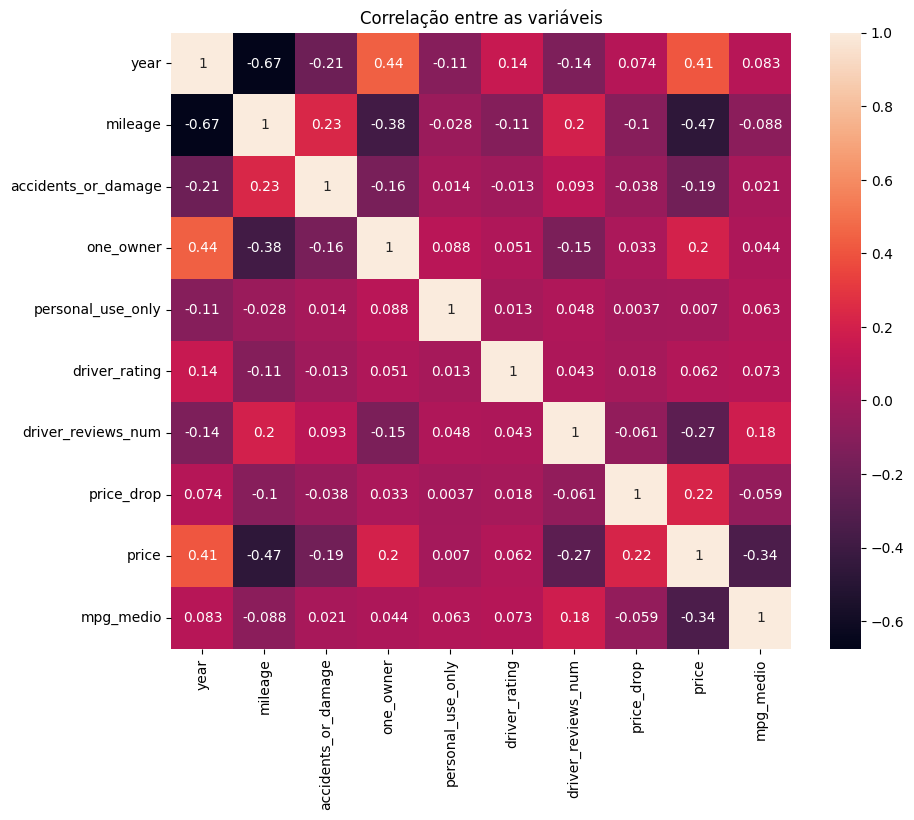

In [217]:
# heatmap com a correlação de Pearson
correlacoes = df.corr(numeric_only=True,method='pearson') # method='pearson'

plt.figure(figsize=(10, 8))
plt.title('Correlação entre as variáveis')
sns.heatmap(correlacoes, annot=True,);

Com base no novo mapa de correlação, as variáveis mais relevantes para prever o preço (com maior correlação absoluta com a variável price) são:

- Year: Correlação de 0.41 (positiva) – Carros mais novos tendem a ser mais caros.
- Mileage: Correlação de -0.47 (negativa) – Carros com maior quilometragem geralmente são mais baratos.
- Price_drop: Correlação de 0.22 (positiva) – Pode indicar um ajuste de preço diretamente relacionado ao valor final.
- MPG_medio: Correlação de -0.34 (negativa) – Carros mais econômicos podem ter preços relativamente mais baixos em algumas condições.

# Pré processamento dos dados

### One Hot encoding

Retirando o atributo alvo.

In [218]:
y = df['price'].values
y

array([53950., 27885., 17987., ..., 13991., 32777., 28319.])

In [219]:
# cols_normalizacao = cols_num[0:8].tolist() + [cols_num[9]] # necessario pra deixar a coluna 'price' de fora da normalização
# len(cols_normalizacao)
print(df.shape)
df.drop(columns='price', inplace=True)
print(df.shape)

(166816, 16)
(166816, 15)


Col categoricas mas que possuem variaveis numericas acidentes_ordemage, one_owner, personal_use_only

In [62]:
amostra_simples.select_dtypes(include=['category']).nunique()

manufacturer         30
model              7963
engine             3902
transmission        654
drivetrain           25
fuel_type            26
mpg                 637
exterior_color     4653
interior_color     2664
seller_name       17007
dtype: int64

Para evitar um ecesso em atributos, serão consideradas apenas as tres colunas com menos valores distintos.

In [222]:
df = pd.get_dummies(df , columns=['manufacturer', 'drivetrain', 'fuel_type', ], dtype=float) #'transmission'
df.shape

(166816, 93)

In [223]:
amostra_simples.select_dtypes(include=['category']).nunique()

manufacturer         30
model              7963
engine             3902
transmission        654
drivetrain           25
fuel_type            26
mpg                 637
exterior_color     4653
interior_color     2664
seller_name       17007
dtype: int64

### Normalização dos dados

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
# Criação do StandardScaler
scaler = StandardScaler()


Aplicar o a normalização dos dados

In [226]:
# cols_num = cols_num.drop('seller_rating')
# Filtrando os nomes das colunas por tipo de dado
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
cols_num

Index(['year', 'mileage', 'accidents_or_damage', 'one_owner',
       'personal_use_only', 'driver_rating', 'driver_reviews_num',
       'price_drop', 'mpg_medio', 'manufacturer_Acura', 'manufacturer_Audi',
       'manufacturer_BMW', 'manufacturer_Buick', 'manufacturer_Cadillac',
       'manufacturer_Chevrolet', 'manufacturer_Chrysler', 'manufacturer_Dodge',
       'manufacturer_Ford', 'manufacturer_GMC', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_INFINITI', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land Rover',
       'manufacturer_Lexus', 'manufacturer_Lincoln', 'manufacturer_Mazda',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Porsche', 'manufacturer_RAM',
       'manufacturer_Subaru', 'manufacturer_Tesla', 'manufacturer_Toyota',
       'manufacturer_Volkswagen', 'manufacturer_Volvo', 'drivetrain_4WD',
       'drivetrain_4x2', 'drivetrain_4x4', 'drivetrain

In [228]:
# df[cols_num] = df[cols_num]
len(cols_num)

90

In [230]:
df.head(2)

,model,year,mileage,engine,transmission,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,...,fuel_type_Gasoline/Mild Electric Hybrid,fuel_type_Hybrid,fuel_type_Hybrid Fuel,fuel_type_Hydrogen Fuel Cell,fuel_type_Natural Gas,fuel_type_PHEV,fuel_type_Plug-In Hybrid,fuel_type_Premium Unleaded,fuel_type_Regular Unleaded,fuel_type_Unspecified
456056,Range Rover Sport HSE Dynamic,2018,33585.0,V6,Automatic,0.0,1.0,0.0,4.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563956,Armada SL,2017,63009.0,5.6L V8 32V GDI DOHC,7-Speed Automatic,0.0,0.0,1.0,4.7,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
# Aplicação da normalização aos dados numéricos com exceção da coluna price
df[cols_num] = scaler.fit_transform(df[cols_num])


In [232]:
df.head(2)

,model,year,mileage,engine,transmission,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,...,fuel_type_Gasoline/Mild Electric Hybrid,fuel_type_Hybrid,fuel_type_Hybrid Fuel,fuel_type_Hydrogen Fuel Cell,fuel_type_Natural Gas,fuel_type_PHEV,fuel_type_Plug-In Hybrid,fuel_type_Premium Unleaded,fuel_type_Regular Unleaded,fuel_type_Unspecified
456056,Range Rover Sport HSE Dynamic,0.020334,-0.552556,V6,Automatic,-0.562064,0.903076,-1.375352,-2.326289,-0.425906,...,-0.005997,-0.18925,0.0,-0.003463,-0.002448,0.0,0.0,-0.004241,-0.003463,-0.002448
563956,Armada SL,-0.231361,0.132214,5.6L V8 32V GDI DOHC,7-Speed Automatic,-0.562064,-1.107327,0.727087,0.260332,-0.146625,...,-0.005997,-0.18925,0.0,-0.003463,-0.002448,0.0,0.0,-0.004241,-0.003463,-0.002448


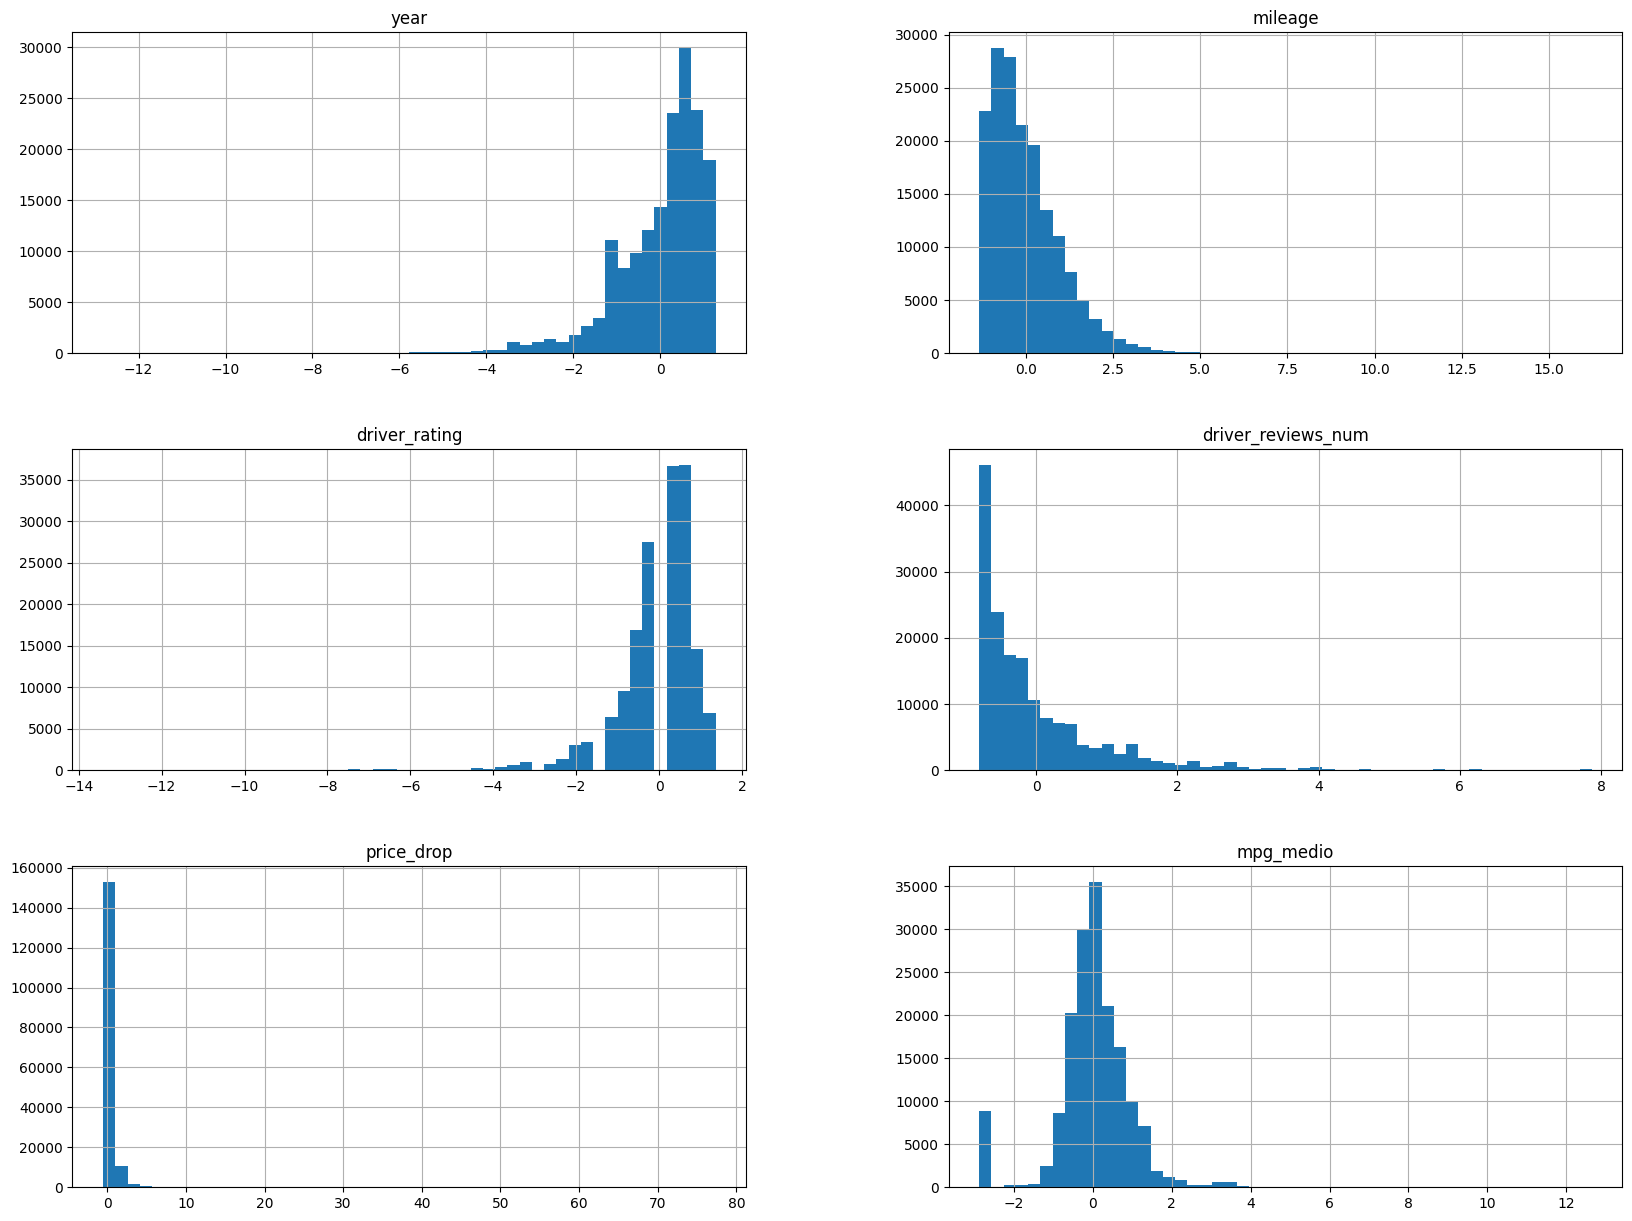

In [72]:
# normalizado.hist(bins=50, figsize=(20,15))
# plt.show()
df.hist(column= cols , bins=50, figsize=(20,15))
plt.show()

<!-- * A partir da matriz de correlação, as colunas que apresentam maior correlação com o preço são:

    - Year: Correlação positiva de 0.39 com o preço, indicando que carros mais novos tendem a ser mais caros.
    - Mileage: Correlação negativa de -0.46, mostrando que carros com maior quilometragem geralmente têm preços mais baixos.
    - Engine: Correlação positiva de 0.32, sugerindo que motores maiores ou mais potentes podem influenciar o preço para mais.
    - Price_drop: Correlação positiva de 0.26, talvez representando mudanças no valor do automóvel antes de sua venda.
    - MPG (Milhas por galão): Correlação negativa de -0.34, indicando que carros mais econômicos podem ter preços mais baixos em algumas situações.

Em primeiro momento essas  colunas serão priorizadas no modelo, pois possuem maior relevância direta com o preço. Variáveis com correlação muito baixa ou próximas de zero (como "manufacturer" e "driver_rating") podem ter menos impacto. A principio as demais variaveis serão descartadas, dependendo do resultado, podem ser transformadas para melhorar a eficiência do modelo. -->

### Divisão do conjunto de dados

In [ ]:
X = df[cols_num].values

# X = df[['year', 'mileage', 'price_drop' ,'mpg_medio']].values
print(X.shape)
X[0]

(166816, 90)


array([ 2.03343808e-02, -5.52556153e-01, -5.62063776e-01,  9.03075870e-01,
       -1.37535195e+00, -2.32628936e+00, -4.25906114e-01, -4.19304121e-02,
       -4.39440665e-01, -1.01618829e-01, -1.58219748e-01, -2.21252616e-01,
       -1.42697145e-01, -1.55349899e-01, -2.80987556e-01, -1.27319633e-01,
       -1.85184588e-01, -3.36006750e-01, -2.05464554e-01, -2.32313792e-01,
       -1.76415191e-01, -1.33197823e-01, -6.81862893e-02, -2.45012005e-01,
       -2.22590851e-01,  7.65635216e+00, -1.76144046e-01, -1.22694632e-01,
       -1.49251056e-01, -2.28650355e-01, -9.03596630e-02, -2.59885384e-01,
       -1.16427255e-01, -1.68396117e-01, -1.88261796e-01, -2.44840045e-03,
       -2.95816248e-01, -1.80545616e-01, -1.09682989e-01, -4.52587628e-02,
        0.00000000e+00,  0.00000000e+00, -6.16195850e-02,  0.00000000e+00,
       -4.24077939e-03,  0.00000000e+00,  0.00000000e+00, -6.74811312e-01,
       -8.30610175e-02, -3.46257150e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [74]:
# y = df['price'].values
print(y.shape)
y[0]

(166816,)


np.float64(53950.0)

In [75]:
#apenas para testes
# X = X[:3000]
# y = y[:3000]
# print(X.shape, y.shape)

In [76]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
print('Tamanho dos conjuntos de treino e teste:')
print(f'Conjunto de treino: {len(x_treino)} \nConjunto de teste: {len(x_teste)}')

Tamanho dos conjuntos de treino e teste:
Conjunto de treino: 116771 
Conjunto de teste: 50045


Os tamanhos ficaram próximos aos estabelecidos nas instruções do projeto.

# Treinamento do modelo

#### Rando Forest

In [269]:
#https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

In [270]:
# Lista para armazenar os resultados das métricas de avaliação dos modelos
lista_rf = [] # mae, mse, rmse, r2

In [271]:
modelo = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=5,)
# min_samples_leaf=2,
# max_features='sqrt',
#   random_state=42,
#     n_jobs=-1

In [272]:
modelo.fit(x_treino, y_treino) #,aplica,o,modelo,nas,variaveis,(x,e,y),de,treino

RandomForestRegressor(max_depth=30, min_samples_split=5)

In [274]:
previsoes_rf = modelo.predict(x_teste)

* Conforme a especificação, as metricas são aplicadas ao conjunto de testes.

In [275]:
# Calculo das métricas de avaliação
r2_rf = r2_score(y_teste, previsoes_rf)
mae_rf = mean_absolute_error(y_teste, previsoes_rf)
mse_rf = mean_squared_error(y_teste, previsoes_rf)
rmse_rf = np.sqrt(mse_rf)

# adiciona a lista de resultados
lista_rf.append([float(mae_rf),float(mse_rf),float(rmse_rf), r2_rf*100]) # mae, mse, rmse, r2


In [276]:
# Exibe os resultados das métricas de avaliação
print(f'R²: {r2_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')

R²: 0.85
MAE: 3062.12
MSE: 71270487.29
RMSE: 8442.18


In [294]:
lista_rf

[[3062.1229629165755, 71270487.28851305, 8442.184983078318, 84.82359270166484]]

#### X-GBoosting

In [79]:
from xgboost import XGBRegressor
# print(xgboost.__version__)

In [265]:
# Lista para armazenar os resultados das métricas de avaliação dos modelos
lista_xgbr = [] # mae, mse, rmse, r2

In [284]:
# Criar o modelo XGBoost
# modelo_xgbr = XGBRegressor(colsample_bytree= 0.71, 
#                             max_depth= 12,
#                             subsample= 0.9999 , 
#                             n_estimators= 800,
#                             learning_rate = 0.04,                    
#                             )
# Modelo otimizado pelo OPTUNA
modelo_xgbr = XGBRegressor(colsample_bytree= 0.7169510312355183, 
                            max_depth= 12,
                            subsample= 0.929830124741997 , 
                            n_estimators= 860,
                            learning_rate = 0.04282265792072568,                    
                            )

In [285]:
from IPython.display import clear_output

# Treinar o modelo
modelo_xgbr.fit(x_treino, y_treino)

clear_output() # Limpar a saída da célula após a execução do treinamento pois aparece uma mensagem de erro, mas o modelo é treinado corretamente.

In [287]:
# Fazer previsões
resultado_xgbr = modelo_xgbr.predict(x_teste)

In [ ]:
# Avaliar o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_xgbr = r2_score(y_teste, resultado_xgbr)
mse_xgbr = mean_squared_error(y_teste, resultado_xgbr)
mae_xgbr = mean_absolute_error(y_teste, resultado_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)


lista_xgbr.append([float(mae_xgbr),float(mse_xgbr),float(rmse_xgbr), r2_xgbr*100]) # mae, mse, rmse, r2

print(f"MAE: {mae_xgbr:.3f}")
print(f"MSE: {mse_xgbr:.3f}")
print(f"RMS: {rmse_xgbr:.3f}")
print(f"R²: {r2_xgbr:.3f}")

# lista_xgbr

MAE: 2839.337
MSE: 62041162.460
RMS: 7876.621
R²: 0.868


* Considerando todos atributos que estão em formato numerico do conjunto de dados
    1. R² (Coeficiente de Determinação): *0.86*, O modelo explica *86%* da variância dos preços no conjunto de teste.
    2. MAE (Erro Absoluto Médio): Em média, as previsões do modelo estão desviando do preço real em aproximadamente *2839.09* $ (Dolares)
    3. MSE (Erro Quadrático Médio): *62041162.460* milhões. Um alto valor indica que o modelo tem previsões com grandes desvios em relação ao valor real.
    4. RMSE (Raiz do Erro Quadrático Médio): *7876.621*. Um RMSE de *~7876* é significativamente maior que o MAE *(~2839)*, sugerindo que o modelo comete alguns erros grandes, que estão puxando o MSE para cima.

* Atributos importantes

In [291]:
# retorna os valores de importancia das variaveis
valores = modelo_xgbr.feature_importances_
valores

array([1.05772968e-02, 6.13325415e-03, 1.08416576e-03, 1.54317741e-03,
       1.30409852e-03, 5.14468038e-03, 1.80155933e-02, 1.88145775e-03,
       2.21291296e-02, 1.16005437e-02, 1.91343091e-02, 2.23697536e-02,
       3.19387391e-03, 1.92229226e-02, 7.71933375e-03, 2.81659886e-03,
       8.72638822e-03, 3.86140449e-03, 3.19171976e-03, 3.48992529e-03,
       3.18193762e-03, 4.83056577e-03, 2.97585432e-03, 5.22375153e-03,
       3.30828619e-03, 2.06112489e-02, 1.24429725e-02, 8.89909547e-03,
       3.80365574e-03, 8.25463682e-02, 1.05376868e-02, 1.28344409e-02,
       4.55641061e-01, 7.04995496e-03, 5.83555829e-03, 9.83702112e-03,
       7.48790754e-03, 3.72720137e-03, 7.49870576e-03, 2.42391112e-03,
       0.00000000e+00, 0.00000000e+00, 7.09899410e-04, 0.00000000e+00,
       8.86710550e-05, 0.00000000e+00, 0.00000000e+00, 9.85207409e-03,
       1.57118135e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.19731387e-02, 2.06475175e-04, 0.00000000e+00,
      

In [292]:
nomes_colunas = df[cols_num].columns.to_list()
print(len(valores), len(nomes_colunas))
# print(nomes_colunas) 
# Criar um novo DataFrame com os nomes das colunas e os valores de importância
df_importancia = pd.DataFrame({'Coluna': nomes_colunas, 'Importancia': valores})


90 90


In [293]:
# Exibi o DataFrame ordenado pela importância das colunas
df_importancia.sort_values(by='Importancia', ascending=False).head(2)

,Coluna,Importancia
32,manufacturer_Porsche,0.455641
29,manufacturer_Mercedes-Benz,0.082546


Para o modelo os dois atributos mais importantes para o modelo do XGBOOST são ***manufacturer_Porsche e manufacturer_Mercedes-Benz***.

#### Multi-layer Perceptron

In [322]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.backend import clear_session
# from tensorflow.ke

In [315]:
# Lista para armazenar os resultados das métricas de avaliação dos modelos
lista_mlp = [] # mae, mse, rmse

In [ ]:
clear_session()  # Limpar a sessão do Keras

# Criar o modelo de rede neural
modelo_mlp = Sequential([
    Dense(128, input_dim=x_treino.shape[1], activation='relu',),    # kernel_initializer='he_normal'
    # Dropout(0.1),  # Dropout de 20%
    # Dense(128, activation='relu'),
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'),                                              
    Dense(1, activation='linear')                      
])
modelo_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

In [323]:
# Compilar o modelo
# model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])
modelo_mlp.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae','root_mean_squared_error'])# 'r2_score'


In [324]:
# # Treinar o modelo
history = modelo_mlp.fit(x_treino, y_treino, epochs=100,  validation_data= (x_teste,y_teste) , verbose=1) # batch_size=3000, ,validation_split=0.2 , 


Epoch 1/100
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 378797408.0000 - mae: 4587.0503 - root_mean_squared_error: 16903.8379 - val_loss: 116703352.0000 - val_mae: 4959.9443 - val_root_mean_squared_error: 10802.9326
Epoch 2/100
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 98562008.0000 - mae: 4493.1597 - root_mean_squared_error: 9895.8545 - val_loss: 96846400.0000 - val_mae: 4217.0649 - val_root_mean_squared_error: 9841.0566
Epoch 3/100
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 71890120.0000 - mae: 4200.0342 - root_mean_squared_error: 8456.5156 - val_loss: 97965464.0000 - val_mae: 4304.6846 - val_root_mean_squared_error: 9897.7500
Epoch 4/100
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 73354024.0000 - mae: 4171.5337 - root_mean_squared_error: 8545.1230 - val_loss: 100149168.0000 - val_mae: 4293.5654 - val_root_mean_squared_error: 10007.4561
Epoch 5/100
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 85490720.0000 - mae: 4238.6353 - root_mean_squared_erro

In [329]:
# Avaliar o modelo
loss, mae, root_mean_squared_error = modelo_mlp.evaluate(x_teste, y_teste)
# lista.append([float(mae),float(loss), float(root_mean_squared_error)])
# lr2.append(r2_score)
# print(f"R²:  {r2_score:.2f}")
# print(f'LOSS: {loss:.2f}')
print(f"MAE: {mae:.2f}")
print(f"MSE: {loss:.2f}")
print(f"RMS: {root_mean_squared_error:.2f}")

# adiciona a lista de resultados
lista_mlp.append([float(mae),float(loss),float(root_mean_squared_error)]) # mae, mse, rmse, r2
# MAE: 3449.74
# MSE: 81179616.00
# RMS: 9009.97

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 112927992.0000 - mae: 3775.2759 - root_mean_squared_error: 10377.8877
MAE: 3748.37
MSE: 102061256.00
RMS: 10102.54


As métricas utilizadas neste desafio são amplamente empregadas em problemas de regressão, pois avaliam diferentes aspectos do desempenho do modelo.

1. R² é utilizado para medir o ajuste global do modelo, indicando a proporção da variabilidade dos dados explicada pelo modelo.
2. MAE (Mean Absolute Error) avalia a magnitude absoluta dos erros, fornecendo uma métrica simples e intuitiva.
3. MSE (Mean Squared Error) penaliza erros maiores de forma mais severa, destacando grandes desvios.
4. RMSE (Root Mean Squared Error) traz uma interpretação na mesma unidade dos dados, facilitando a análise prática.

O uso combinado dessas métricas garante uma avaliação equilibrada e abrangente do desempenho do modelo, considerando tanto o ajuste geral quanto os diferentes tipos de erro.

# Tuning

 XGBOOST 

In [246]:
import optuna
import joblib

In [253]:
def objective(trial):
    #parametros do modelo
    colsample_bytree= trial.suggest_float('colsample_bytree', 0.7, 0.8)
    max_depth = trial.suggest_int('max_depth', 12, 16, step=2) 
    # gama = trial.suggest_float('gama', 0.1, 0.3) gama= gama, 
    subsample = trial.suggest_float('subsample', 0.9, 1)  
    n_estimators = trial.suggest_int('n_estimators', 860,880, step = 20) 
    learning_rate = trial.suggest_float('learning_rate', 0.04, 0.05) 
    
    
    
    # criação do modelo
    # modelo = XGBRegressor(colsample_bytree= colsample_bytree , max_depth= max_depth, subsample= subsample, n_estimators= n_estimators, learning_rate= learning_rate)
    modelo = XGBRegressor(colsample_bytree= colsample_bytree, learning_rate= learning_rate ,subsample= subsample, max_depth= max_depth, n_estimators= n_estimators) # 

    # treinamento do modelo
    modelo.fit(x_treino, y_treino)

    # previsões
    y_pred = modelo.predict(x_teste)
    
    # métricas de avaliação
    # r2 = r2_score(y_teste, y_pred)
    mae = mean_absolute_error(y_teste, y_pred)
    # mse = mean_squared_error(y_teste, y_pred)
    # rmse = np.sqrt(mse)
    # acuracia = accuracy_score(y_test, y_pred)
    return  mae 

In [254]:
studyxgbr = optuna.create_study(direction='minimize')

[I 2025-01-27 19:28:07,525] A new study created in memory with name: no-name-3520146c-3079-4958-809d-b019c38279c0


In [255]:
studyxgbr.optimize(objective, n_trials=10)

[I 2025-01-27 19:30:19,174] Trial 0 finished with value: 2849.632543430639 and parameters: {'colsample_bytree': 0.7528724996683809, 'max_depth': 12, 'subsample': 0.9909348000027927, 'n_estimators': 880, 'learning_rate': 0.04725291365158613}. Best is trial 0 with value: 2849.632543430639.
[I 2025-01-27 19:32:31,855] Trial 1 finished with value: 2849.441542938504 and parameters: {'colsample_bytree': 0.7591165670564529, 'max_depth': 12, 'subsample': 0.9023224119764245, 'n_estimators': 860, 'learning_rate': 0.043216614399030885}. Best is trial 1 with value: 2849.441542938504.
[I 2025-01-27 19:34:41,203] Trial 2 finished with value: 2839.3366922918785 and parameters: {'colsample_bytree': 0.7169510312355183, 'max_depth': 12, 'subsample': 0.929830124741997, 'n_estimators': 860, 'learning_rate': 0.04282265792072568}. Best is trial 2 with value: 2839.3366922918785.
[I 2025-01-27 19:37:58,911] Trial 3 finished with value: 2894.8477964802382 and parameters: {'colsample_bytree': 0.7909160897583357

In [256]:
studyxgbr.best_params

{'colsample_bytree': 0.7169510312355183,
 'max_depth': 12,
 'subsample': 0.929830124741997,
 'n_estimators': 860,
 'learning_rate': 0.04282265792072568}

In [257]:
studyxgbr.best_value

2839.3366922918785

In [258]:
optuna.visualization.plot_param_importances(studyxgbr)

# Avaliação

#### Cria os Graficos

In [367]:
# gera o grafico do mae mse rmse
def grafico_erros_medio(nomes, valores):

  # Dados para o gráfico
  algoritmos = nomes  # eixo x, nomes dos algoritmos
  val = valores  # valores das métricas, (MAE, MSE, RMSE) para cada algoritmo

  # gráfico
  x = np.arange(len(algoritmos))  # Posições das barras no eixo x
  width = 0.25  # Largura das barras

  # Criação do gráfico
  fig, ax = plt.subplots(figsize=(10, 6))

  # Barras individuais
  bars1 = ax.bar(x - width, [v[0] for v in val], width, label='MAE', color='palegreen', edgecolor='black')
  bars2 = ax.bar(x, [v[1] for v in val], width, label='MSE', color='skyblue', edgecolor='black')
  bars3 = ax.bar(x + width, [v[2] for v in val], width, label='RMSE', color='#FFDAB9', edgecolor='black')

  # Adicionar os valores no topo de cada barra
  for bars in [bars1, bars2, bars3]:
      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

  # Configuração do eixo x e título
  ax.set_xticks(x)
  ax.set_xticklabels(algoritmos)
  ax.set_xlabel('Algoritmos')
  ax.set_ylabel('Valores das Métricas')
  ax.set_title('Comparação de Métricas por Algoritmo')
  ax.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y
  # Ajustar a escala do eixo y para logarítmica
  ax.set_yscale('log')

  # Exibir o gráfico
  plt.tight_layout()
  plt.show()

# gera o grafico do R2
def gradicos_r2(nomes, valores): #nomes 

  algoritmos = nomes
  results = valores

  # Dados para o gráfico
  # algoritmos = ['Random Forest', 'XGBoost']

  # gráfico
  x = np.arange(len(algoritmos))  # Posições das barras no eixo x
  width = 0.35  # Largura das barras

  # Definir cores para cada barra
  colors = ['dodgerblue', '#fc7303']

  # Criação do gráfico
  fig, ax = plt.subplots(figsize=(6, 5))

  # Barras individuais com cores diferentes
  bars = ax.bar(x, results, width, color=colors, edgecolor='black') #label='R²'

  # Adicionar os valores no topo de cada barra
  for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

  # Configuração do eixo x e título
  ax.set_xticks(x)
  ax.set_xticklabels(algoritmos)
  ax.set_xlabel('Algoritmos')
  ax.set_ylabel('R² (%)')
  ax.set_title('Comparação de R² por Algoritmo')
  # ax.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar uma grade no eixo y

  # Exibir o gráfico
  plt.tight_layout()
  plt.show()

### Resultados

#### Sem Tuning

In [370]:
vals = [lista_rf[0][:3], lista_xgbr[0][:3], lista_mlp[0][:3]]
vals_r2 = [lista_rf[0][-1], lista_xgbr[0][-1]]
nomes = ['Random Forest', 'XGBoost', 'MLP']
nomes_r2 = ['Random Forest', 'XGBoost']

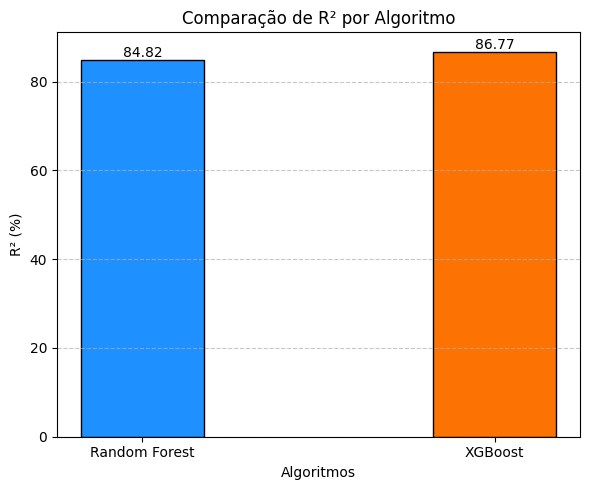

In [372]:
gradicos_r2( nomes_r2,vals_r2)

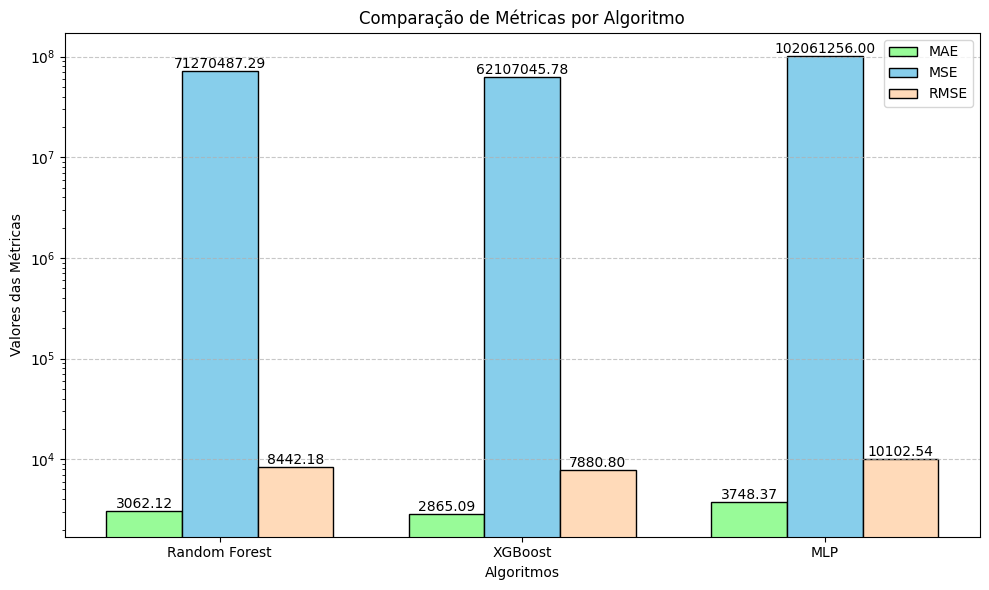

In [353]:
grafico_erros_medio(nomes , vals)

### Pós Tuning

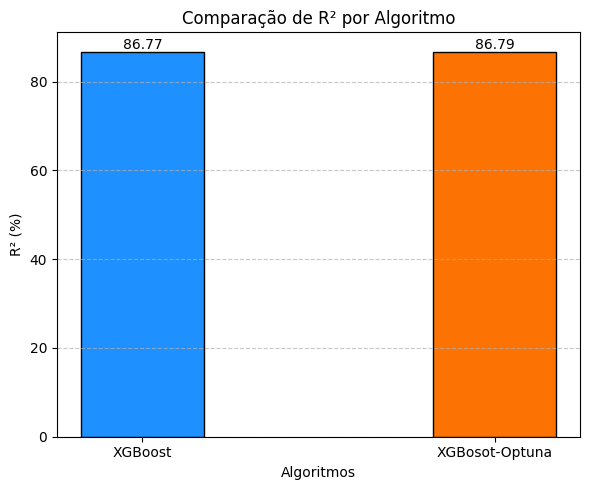

In [368]:
val_xgbr = [lista_xgbr[0][-1],lista_xgbr[1][-1]]
gradicos_r2(xg , val_xgbr)
# val_xgbr

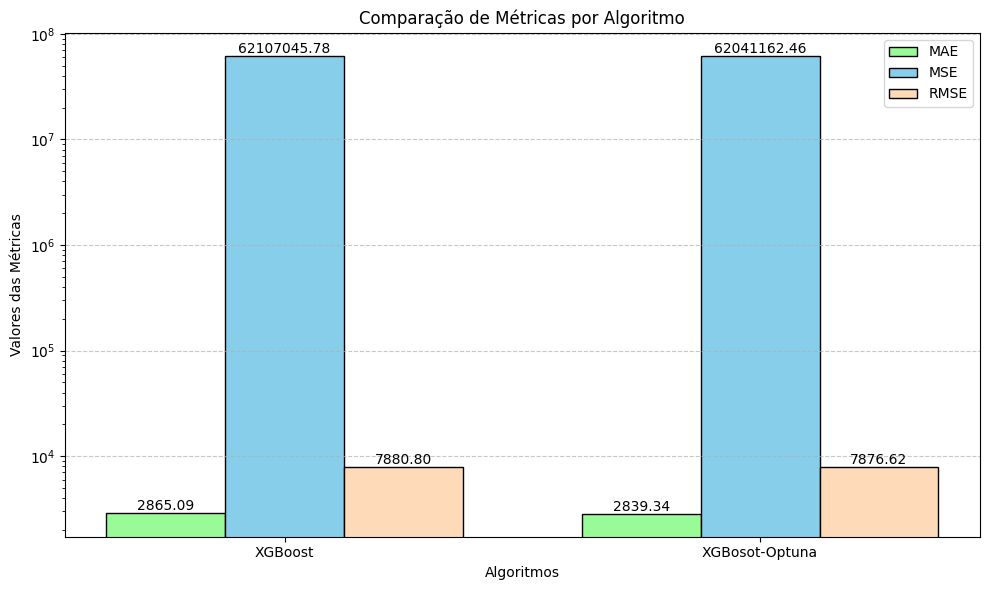

In [ ]:
xg = ['XGBoost','XGBosot-Optuna']
val_xgbr = [lista_xgbr[0][:3],lista_xgbr[1][:3]]
grafico_erros_medio(xg , val_xgbr)
